In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import  warnings
warnings.filterwarnings("ignore")

# Simulated data: Let's assume we have architectural data with space, energy, and material usage
data = {
    'space_area': np.random.uniform(50, 200, 100), # square meters
    'energy_usage': np.random.uniform(100, 500, 100), # energy in kWh
    'material_cost': np.random.uniform(1000, 10000, 100), # cost in USD
    'sustainability_index': np.random.uniform(0, 1, 100), # 0 to 1 scale
    'aesthetic_score': np.random.uniform(0, 10, 100), # subjective score
}

# Create a DataFrame
df = pd.DataFrame(data)

# Normalize data using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Show the first few rows
#print(df_scaled.head())
df_scaled

,space_area,energy_usage,material_cost,sustainability_index,aesthetic_score
0,-1.330968,0.906845,-0.924572,-0.613902,-1.514849
1,1.085067,-0.061735,0.929061,1.241147,-1.462015
2,0.146124,-0.564263,-1.144195,-1.158287,-0.071100
3,0.592508,-0.298418,-1.221957,-1.539696,-0.781357
4,1.526817,1.499945,0.811700,-0.258160,0.629194
...,...,...,...,...,...
95,-0.788258,1.273511,0.632501,-0.952325,0.276126
96,-1.481643,-0.033987,-0.106706,-1.364573,1.145341
97,-1.532338,0.243221,1.079267,1.376378,1.518440
98,-1.314443,0.233661,1.173199,-0.749832,-0.153579


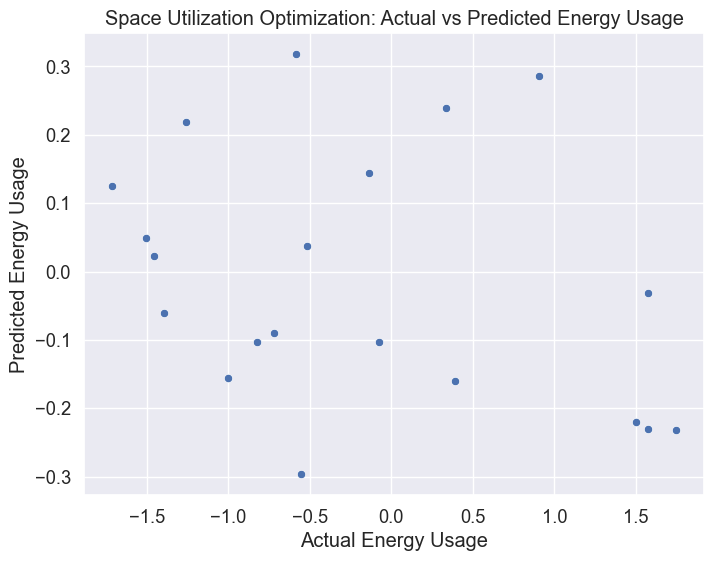

Model coefficients (Space Area, Material Cost): [-0.09514989 -0.13526529]


In [56]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Select features and target for space utilization optimization
# We are trying to predict energy usage based on space area and material cost
X = df_scaled[['space_area', 'material_cost']]  # Features (space area and material cost)
y = df_scaled['energy_usage']  # Target (energy usage)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict energy usage on the test set
y_pred = model.predict(X_test)

# Visualize the predicted vs actual energy usage
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Energy Usage')
plt.ylabel('Predicted Energy Usage')
plt.title('Space Utilization Optimization: Actual vs Predicted Energy Usage')
plt.show()

# Coefficients of the model (Space area and Material cost importance)
print("Model coefficients (Space Area, Material Cost):", model.coef_)


In [57]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate 2000 rows of data
n_rows = 2000

# Simulating features related to energy efficiency
building_orientations = np.random.choice(['North', 'South', 'East', 'West'], size=n_rows)
insulation_quality = np.random.choice(['Low', 'Medium', 'High'], size=n_rows)
hvac_efficiency = np.random.randint(1, 10, size=n_rows)  # 1-10 scale for efficiency

# Simulating material usage
concrete_usage = np.random.randint(300, 800, size=n_rows)  # in kg
steel_usage = np.random.randint(100, 500, size=n_rows)  # in kg
glass_usage = np.random.randint(50, 300, size=n_rows)  # in kg
wood_usage = np.random.randint(100, 400, size=n_rows)  # in kg

# Simulating energy usage (target for the ML model)
energy_usage = np.random.randint(100, 500, size=n_rows)  # kWh/day

# Simulating carbon footprint (using arbitrary constants for each material)
carbon_footprint_concrete = 0.5  # kg CO2 per kg material
carbon_footprint_steel = 0.8
carbon_footprint_glass = 0.3
carbon_footprint_wood = 0.4

# Calculating the total carbon footprint for each row
carbon_footprint = (concrete_usage * carbon_footprint_concrete +
                    steel_usage * carbon_footprint_steel +
                    glass_usage * carbon_footprint_glass +
                    wood_usage * carbon_footprint_wood)

# Other random columns (can be related to sustainability, aesthetic ratings, etc.)
sustainability_score = np.random.uniform(0, 1, size=n_rows)  # 0 to 1 scale
aesthetic_score = np.random.uniform(1, 10, size=n_rows)  # 1-10 scale
building_size = np.random.randint(100, 1000, size=n_rows)  # in square meters
window_area = np.random.randint(50, 300, size=n_rows)  # in square meters
energy_efficiency_rating = np.random.choice(['A', 'B', 'C', 'D'], size=n_rows)

# Create a DataFrame with the generated data
data = pd.DataFrame({
    'building_orientation': building_orientations,
    'insulation_quality': insulation_quality,
    'hvac_efficiency': hvac_efficiency,
    'concrete_usage': concrete_usage,
    'steel_usage': steel_usage,
    'glass_usage': glass_usage,
    'wood_usage': wood_usage,
    'energy_usage': energy_usage,
    'carbon_footprint': carbon_footprint,
    'sustainability_score': sustainability_score,
    'aesthetic_score': aesthetic_score,
    'building_size': building_size,
    'window_area': window_area,
    'energy_efficiency_rating': energy_efficiency_rating
})

# Print the first few rows of the dataframe
data.columns

# Optionally save the dataset to a CSV file
#data.to_csv('dummy_architectural_data.csv', index=False)


Index(['building_orientation', 'insulation_quality', 'hvac_efficiency',
       'concrete_usage', 'steel_usage', 'glass_usage', 'wood_usage',
       'energy_usage', 'carbon_footprint', 'sustainability_score',
       'aesthetic_score', 'building_size', 'window_area',
       'energy_efficiency_rating'],
      dtype='object')

In [58]:
# Concatenate the datasets horizontally (add columns)
df = pd.concat([data, df_scaled], axis=1)

# Check the combined dataset
df

,building_orientation,insulation_quality,hvac_efficiency,concrete_usage,steel_usage,glass_usage,wood_usage,energy_usage,carbon_footprint,sustainability_score,aesthetic_score,building_size,window_area,energy_efficiency_rating,space_area,energy_usage,material_cost,sustainability_index,aesthetic_score
0,East,High,2,500,383,93,173,317,653.5,0.144853,1.772580,232,59,A,-1.330968,0.906845,-0.924572,-0.613902,-1.514849
1,West,Medium,3,584,411,177,140,498,729.9,0.581530,7.569241,465,264,A,1.085067,-0.061735,0.929061,1.241147,-1.462015
2,North,High,2,625,198,157,176,406,588.4,0.168214,8.840243,181,93,D,0.146124,-0.564263,-1.144195,-1.158287,-0.071100
3,East,High,3,708,296,207,286,235,767.3,0.424631,9.730581,992,179,D,0.592508,-0.298418,-1.221957,-1.539696,-0.781357
4,East,Low,6,394,465,66,151,496,649.2,0.460972,9.339399,930,276,C,1.526817,1.499945,0.811700,-0.258160,0.629194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,North,High,7,311,217,146,161,444,437.3,0.467916,6.747794,824,216,A,NaN,NaN,NaN,NaN,NaN
1996,South,Medium,8,624,288,254,372,365,767.4,0.567536,2.539541,453,73,C,NaN,NaN,NaN,NaN,NaN
1997,North,High,4,737,230,101,328,321,714.0,0.791204,8.743876,923,215,C,NaN,NaN,NaN,NaN,NaN
1998,East,Low,3,543,311,187,119,173,624.0,0.559758,5.788121,199,137,A,NaN,NaN,NaN,NaN,NaN


In [59]:
# Concatenate the datasets horizontally (add columns)
df = pd.concat([data, df_scaled], axis=1)

# Check the combined dataset
df

,building_orientation,insulation_quality,hvac_efficiency,concrete_usage,steel_usage,glass_usage,wood_usage,energy_usage,carbon_footprint,sustainability_score,aesthetic_score,building_size,window_area,energy_efficiency_rating,space_area,energy_usage,material_cost,sustainability_index,aesthetic_score
0,East,High,2,500,383,93,173,317,653.5,0.144853,1.772580,232,59,A,-1.330968,0.906845,-0.924572,-0.613902,-1.514849
1,West,Medium,3,584,411,177,140,498,729.9,0.581530,7.569241,465,264,A,1.085067,-0.061735,0.929061,1.241147,-1.462015
2,North,High,2,625,198,157,176,406,588.4,0.168214,8.840243,181,93,D,0.146124,-0.564263,-1.144195,-1.158287,-0.071100
3,East,High,3,708,296,207,286,235,767.3,0.424631,9.730581,992,179,D,0.592508,-0.298418,-1.221957,-1.539696,-0.781357
4,East,Low,6,394,465,66,151,496,649.2,0.460972,9.339399,930,276,C,1.526817,1.499945,0.811700,-0.258160,0.629194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,North,High,7,311,217,146,161,444,437.3,0.467916,6.747794,824,216,A,NaN,NaN,NaN,NaN,NaN
1996,South,Medium,8,624,288,254,372,365,767.4,0.567536,2.539541,453,73,C,NaN,NaN,NaN,NaN,NaN
1997,North,High,4,737,230,101,328,321,714.0,0.791204,8.743876,923,215,C,NaN,NaN,NaN,NaN,NaN
1998,East,Low,3,543,311,187,119,173,624.0,0.559758,5.788121,199,137,A,NaN,NaN,NaN,NaN,NaN


In [60]:
# Assuming 'df' is your DataFrame

# Fill missing values for categorical columns with the mode
categorical_columns = ['building_orientation', 'insulation_quality', 'hvac_efficiency',"space_area","material_cost","sustainability_index"]
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing values for numerical columns with the median
numerical_columns = ['energy_usage', 'carbon_footprint', 'sustainability_score', 'aesthetic_score']
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

# Now you can safely proceed with further operations


In [61]:
df["energy_usage"]

,energy_usage,energy_usage
0,317,0.906845
1,498,-0.061735
2,406,-0.564263
3,235,-0.298418
4,496,1.499945
...,...,...
1995,444,301.000000
1996,365,301.000000
1997,321,301.000000
1998,173,301.000000


In [62]:
df.isnull().sum()
#df.fillna(df.mean(),inplace=True)

building_orientation        0
insulation_quality          0
hvac_efficiency             0
concrete_usage              0
steel_usage                 0
glass_usage                 0
wood_usage                  0
energy_usage                0
carbon_footprint            0
sustainability_score        0
aesthetic_score             0
building_size               0
window_area                 0
energy_efficiency_rating    0
space_area                  0
energy_usage                0
material_cost               0
sustainability_index        0
aesthetic_score             0
dtype: int64

(2000,)
Mean Absolute Error (MAE) for Energy Efficiency Model: 101.63205794549972


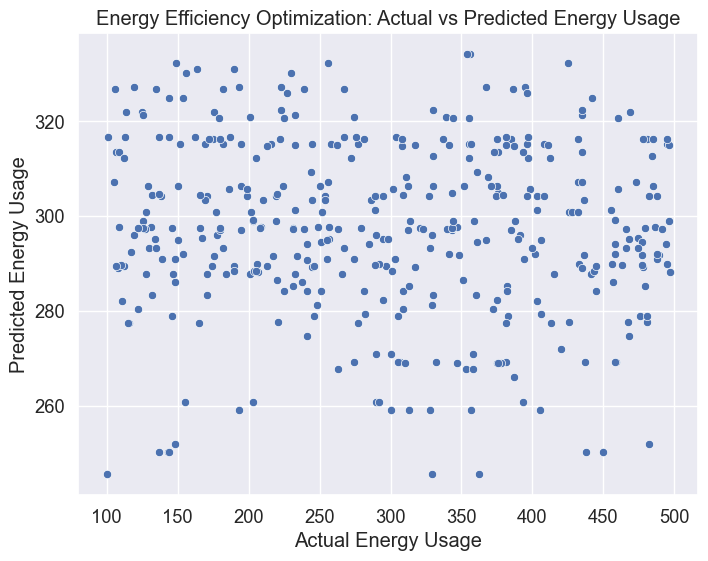

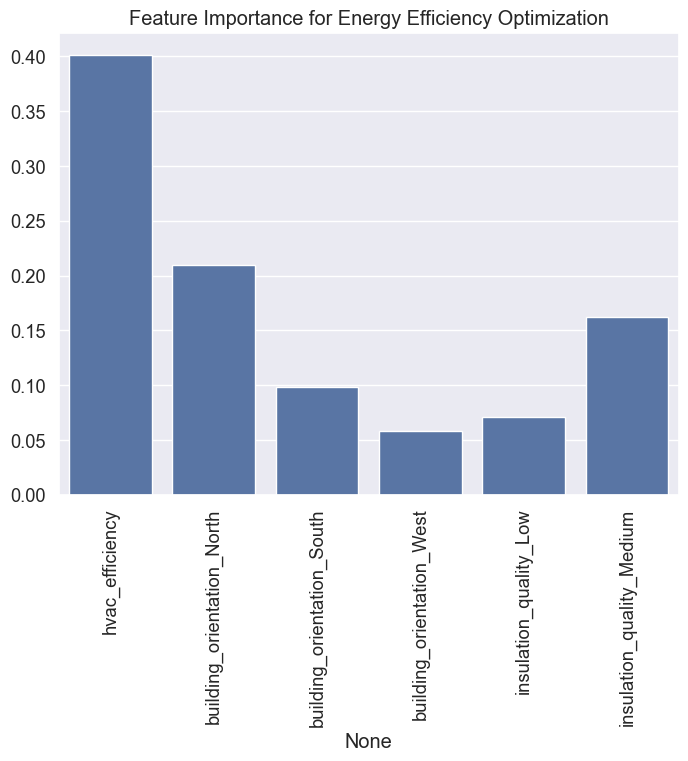

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Select features related to energy efficiency optimization
X_energy = df[['building_orientation', 'insulation_quality', 'hvac_efficiency']]  # Features

# Ensure the target variable is a single column and a 1D array
y_energy = df['energy_usage'].iloc[:, 0]  # Selecting only the first column of the energy_usage
print(y_energy.shape)  # Should print something like (2000,)

# Apply One-Hot Encoding to categorical columns
X_energy_encoded = pd.get_dummies(X_energy, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_energy_encoded, y_energy, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor model
energy_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
energy_model.fit(X_train, y_train)

# Predict energy usage on the test set
y_energy_pred = energy_model.predict(X_test)

# Calculate Mean Absolute Error (MAE) to evaluate the model
mae = mean_absolute_error(y_test, y_energy_pred)
print(f"Mean Absolute Error (MAE) for Energy Efficiency Model: {mae}")

# Visualize the predicted vs actual energy usage
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_energy_pred)
plt.xlabel('Actual Energy Usage')
plt.ylabel('Predicted Energy Usage')
plt.title('Energy Efficiency Optimization: Actual vs Predicted Energy Usage')
plt.show()

# Feature Importance
feature_importance = energy_model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=X_energy_encoded.columns, y=feature_importance)
plt.title('Feature Importance for Energy Efficiency Optimization')
plt.xticks(rotation=90)
plt.show()


In [64]:
df.columns

Index(['building_orientation', 'insulation_quality', 'hvac_efficiency',
       'concrete_usage', 'steel_usage', 'glass_usage', 'wood_usage',
       'energy_usage', 'carbon_footprint', 'sustainability_score',
       'aesthetic_score', 'building_size', 'window_area',
       'energy_efficiency_rating', 'space_area', 'energy_usage',
       'material_cost', 'sustainability_index', 'aesthetic_score'],
      dtype='object')

In [65]:
# Create a dummy dataset for the given columns
np.random.seed(42)

# Generate random data for the features
material_strength = np.random.uniform(50, 150, size=2000)  # Material strength in some arbitrary units
weight_distribution = np.random.uniform(0.1, 1.0, size=2000)  # Weight distribution as a percentage
structural_load = np.random.uniform(1000, 5000, size=2000)  # Structural load in kilograms
building_height = np.random.uniform(5, 100, size=2000)  # Building height in meters

# Generate random target values for structural efficiency
structural_efficiency = material_strength * 0.4 + weight_distribution * 20 + structural_load * 0.02 + building_height * 0.1 + np.random.normal(0, 10, 2000)

# Create the dataframe
df_dummy = pd.DataFrame({
    'material_strength': material_strength,
    'weight_distribution': weight_distribution,
    'structural_load': structural_load,
    'building_height': building_height,
    'structural_efficiency': structural_efficiency
})

# Display the first few rows of the dataset
df_dummy.head()


,material_strength,weight_distribution,structural_load,building_height,structural_efficiency
0,87.454012,0.335535,3287.983513,66.584411,123.698581
1,145.071431,0.322281,4221.729317,21.376704,162.323310
2,123.199394,0.915629,4040.643719,87.877484,137.719538
3,109.865848,0.324592,1615.599619,63.246043,98.859346
4,65.601864,0.344755,1596.997879,19.934369,58.963949


In [66]:
# Concatenate the datasets horizontally (add columns)
df1 = pd.concat([df, df_dummy], axis=1)

# Check the combined dataset
df1

,building_orientation,insulation_quality,hvac_efficiency,concrete_usage,steel_usage,glass_usage,wood_usage,energy_usage,carbon_footprint,sustainability_score,...,space_area,energy_usage,material_cost,sustainability_index,aesthetic_score,material_strength,weight_distribution,structural_load,building_height,structural_efficiency
0,East,High,2,500,383,93,173,317,653.5,0.144853,...,-1.330968,0.906845,-0.924572,-0.613902,-1.514849,87.454012,0.335535,3287.983513,66.584411,123.698581
1,West,Medium,3,584,411,177,140,498,729.9,0.581530,...,1.085067,-0.061735,0.929061,1.241147,-1.462015,145.071431,0.322281,4221.729317,21.376704,162.323310
2,North,High,2,625,198,157,176,406,588.4,0.168214,...,0.146124,-0.564263,-1.144195,-1.158287,-0.071100,123.199394,0.915629,4040.643719,87.877484,137.719538
3,East,High,3,708,296,207,286,235,767.3,0.424631,...,0.592508,-0.298418,-1.221957,-1.539696,-0.781357,109.865848,0.324592,1615.599619,63.246043,98.859346
4,East,Low,6,394,465,66,151,496,649.2,0.460972,...,1.526817,1.499945,0.811700,-0.258160,0.629194,65.601864,0.344755,1596.997879,19.934369,58.963949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,North,High,7,311,217,146,161,444,437.3,0.467916,...,-1.685027,301.000000,-1.551623,-1.670345,5.559329,115.695516,0.497896,3737.741444,30.950164,137.858611
1996,South,Medium,8,624,288,254,372,365,767.4,0.567536,...,-1.685027,301.000000,-1.551623,-1.670345,5.559329,145.661462,0.400961,3012.881659,24.904326,127.159599
1997,North,High,4,737,230,101,328,321,714.0,0.791204,...,-1.685027,301.000000,-1.551623,-1.670345,5.559329,56.895802,0.455115,4060.595399,48.256231,128.224729
1998,East,Low,3,543,311,187,119,173,624.0,0.559758,...,-1.685027,301.000000,-1.551623,-1.670345,5.559329,55.705472,0.576947,2941.162536,91.301567,116.312929


In [67]:
df=df1.copy()

Mean Squared Error (MSE) for Structural Efficiency Model: 108.92209572456053


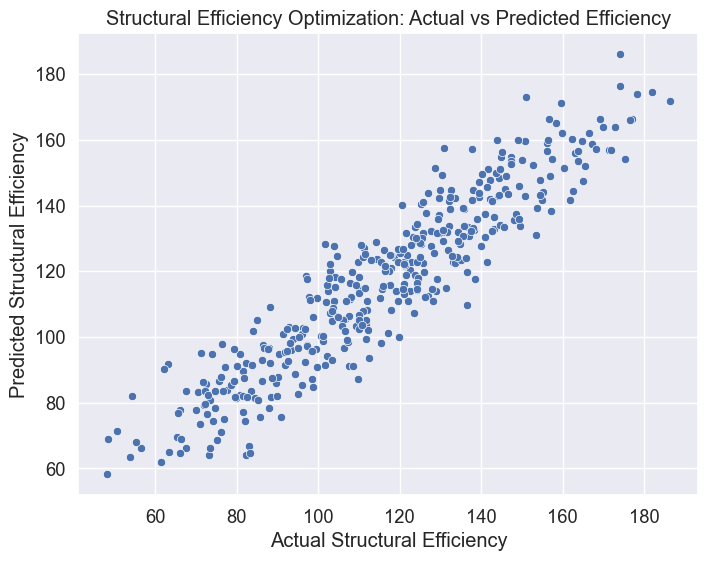

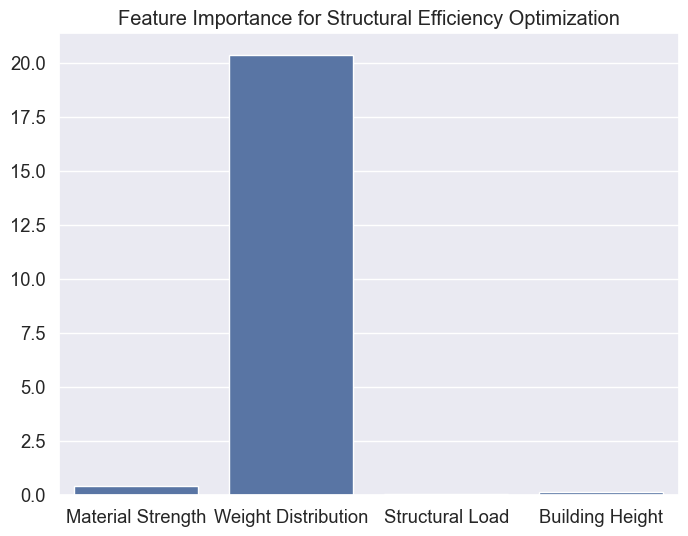

In [68]:
# Assuming we have a dataframe 'df' with relevant features for structural efficiency
X_structural = df[['material_strength', 'weight_distribution', 'structural_load', 'building_height']]
y_structural = df['structural_efficiency']  # Target (Efficiency score)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_structural, y_structural, test_size=0.2, random_state=42)

# Train a Linear Regression model
structural_model = LinearRegression()
structural_model.fit(X_train, y_train)

# Predict structural efficiency on the test set
y_structural_pred = structural_model.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_structural_pred)
print(f"Mean Squared Error (MSE) for Structural Efficiency Model: {mse}")

# Visualize the predicted vs actual structural efficiency scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_structural_pred)
plt.xlabel('Actual Structural Efficiency')
plt.ylabel('Predicted Structural Efficiency')
plt.title('Structural Efficiency Optimization: Actual vs Predicted Efficiency')
plt.show()

# Feature Importance (based on coefficients of linear regression model)
coefficients = structural_model.coef_
plt.figure(figsize=(8, 6))
sns.barplot(x=['Material Strength', 'Weight Distribution', 'Structural Load', 'Building Height'], y=coefficients)
plt.title('Feature Importance for Structural Efficiency Optimization')
plt.show()


Encoded columns: Index(['building_area', 'window_wall_ratio', 'material_carbon_footprint',
       'energy_consumption', 'insulation_quality_High',
       'insulation_quality_Low', 'insulation_quality_Medium',
       'energy_sources_Hybrid', 'energy_sources_Solar', 'energy_sources_Wind'],
      dtype='object')
Mean Absolute Error (MAE) for Sustainability Model: 102.49218679455849


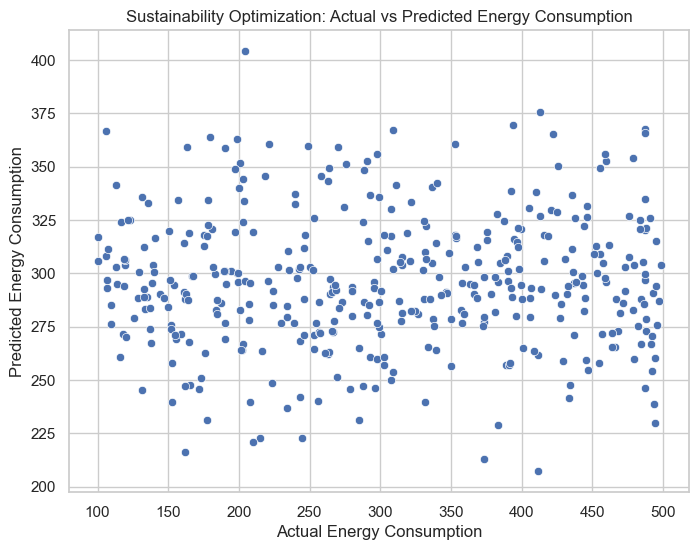

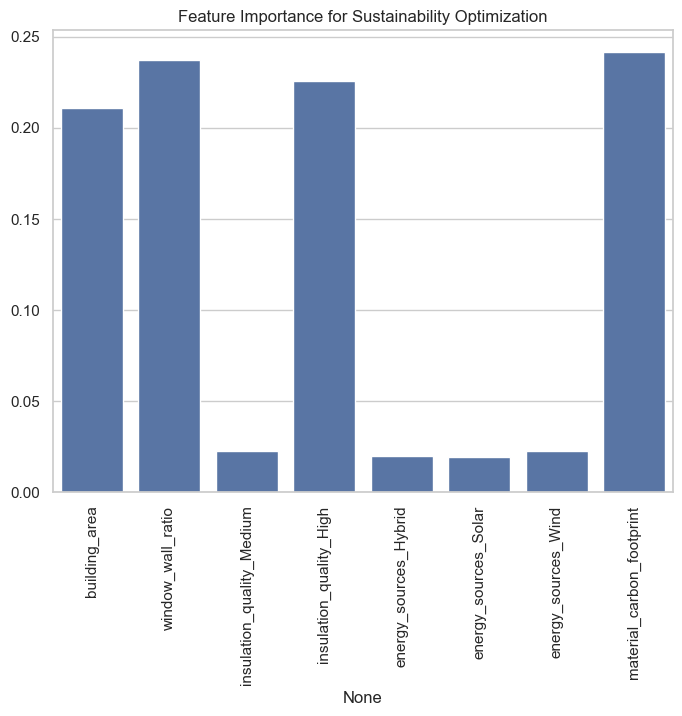

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


# Create a dummy dataset
np.random.seed(42)

# Features for sustainability optimization
building_area = np.random.randint(50, 500, size=2000)  # Building area in square meters
window_wall_ratio = np.random.uniform(0.1, 0.8, size=2000)  # Window to wall ratio (0.1 to 0.8)
insulation_quality = np.random.choice(['Low', 'Medium', 'High'], size=2000)  # Insulation quality (categorical)
energy_sources = np.random.choice(['Solar', 'Grid', 'Wind', 'Hybrid'], size=2000)  # Energy sources (categorical)
material_carbon_footprint = np.random.uniform(5, 50, size=2000)  # Material carbon footprint (in kg CO2)
insulation_quality_High = np.random.uniform(5, 50, size=2000)
# Target: energy consumption or carbon footprint (continuous values)
energy_consumption = np.random.uniform(100, 500, size=2000)  # Energy consumption in kWh or CO2 footprint

# Creating DataFrame
df_sustainability = pd.DataFrame({
    'building_area': building_area,
    'window_wall_ratio': window_wall_ratio,
    'insulation_quality': insulation_quality,
    'energy_sources': energy_sources,
    'material_carbon_footprint': material_carbon_footprint,
    'energy_consumption': energy_consumption,
    "insulation_quality_High":insulation_quality_High
})

# Apply one-hot encoding to categorical variables
df_sustainability_encoded = pd.get_dummies(df_sustainability, drop_first=True)

# Check the column names after encoding
print("Encoded columns:", df_sustainability_encoded.columns)

# Select the correct columns after one-hot encoding
X_sustainability = df_sustainability_encoded[['building_area', 'window_wall_ratio', 
                                              'insulation_quality_Medium', 'insulation_quality_High', 
                                              'energy_sources_Hybrid', 'energy_sources_Solar', 
                                              'energy_sources_Wind', 'material_carbon_footprint']]
y_sustainability = df_sustainability['energy_consumption']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sustainability, y_sustainability, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
sustainability_model = RandomForestRegressor(n_estimators=100, random_state=42)
sustainability_model.fit(X_train, y_train)

# Predict energy consumption on the test set
y_sustainability_pred = sustainability_model.predict(X_test)

# Calculate Mean Absolute Error (MAE) to evaluate the model
mae = mean_absolute_error(y_test, y_sustainability_pred)
print(f"Mean Absolute Error (MAE) for Sustainability Model: {mae}")

# Visualize the predicted vs actual energy consumption
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_sustainability_pred)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Sustainability Optimization: Actual vs Predicted Energy Consumption')
plt.show()

# Feature Importance (based on feature importances from Random Forest model)
feature_importance = sustainability_model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=X_sustainability.columns, y=feature_importance)
plt.title('Feature Importance for Sustainability Optimization')
plt.xticks(rotation=90)
plt.show()


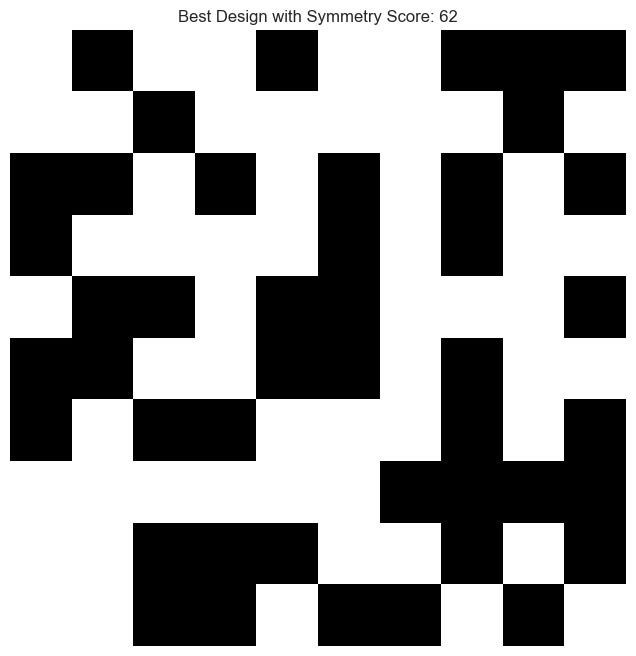

In [84]:
import random

# Parameters for generating a design (for simplicity, a 2D grid layout)
width = 10
height = 10
population_size = 20
generations = 100
mutation_rate = 0.1

# Aesthetic function: measures symmetry of the layout
def symmetry_score(layout):
    """Calculate the symmetry score based on the 2D layout grid."""
    score = 0
    for i in range(len(layout)):
        for j in range(len(layout[i])):
            if layout[i][j] == layout[len(layout) - 1 - i][len(layout[i]) - 1 - j]:
                score += 1
    return score

# Generate an initial random population of layouts (represented as 2D grids)
def generate_population():
    return [np.random.choice([0, 1], size=(width, height)) for _ in range(population_size)]

# Crossover operation: combines two parent layouts to create a child
def crossover(parent1, parent2):
    crossover_point = random.randint(0, width - 1)
    child = np.copy(parent1)
    child[:, crossover_point:] = parent2[:, crossover_point:]
    return child

# Mutation operation: introduces random changes to the layout
def mutate(layout):
    if random.random() < mutation_rate:
        i, j = random.randint(0, width-1), random.randint(0, height-1)
        layout[i, j] = 1 - layout[i, j]  # Flip the element (0 to 1 or 1 to 0)
    return layout

# Main loop to evolve designs using genetic algorithm
def generate_designs():
    population = generate_population()
    best_layout = None
    best_score = -1

    for gen in range(generations):
        population_scores = [symmetry_score(layout) for layout in population]
        best_idx = np.argmax(population_scores)
        if population_scores[best_idx] > best_score:
            best_score = population_scores[best_idx]
            best_layout = population[best_idx]
        
        # Select parents based on their score
        parents = random.choices(population, weights=population_scores, k=population_size//2)
        next_generation = []

        # Create children using crossover and mutation
        for i in range(0, len(parents), 2):
            parent1, parent2 = parents[i], parents[i+1]
            child = crossover(parent1, parent2)
            child = mutate(child)
            next_generation.append(child)
        
        # Replace old population with the new generation
        population = next_generation

    return best_layout, best_score

# Generate the best design and display it
best_design, best_symmetry_score = generate_designs()

# Visualize the best design layout (0: background, 1: feature)
plt.figure(figsize=(8, 8))
plt.imshow(best_design, cmap='binary', interpolation='nearest')
plt.title(f'Best Design with Symmetry Score: {best_symmetry_score}')
plt.axis('off')
plt.show()


Best Structural Layout:
Beam Lengths: [2.12935632 6.73335056 2.10126263 2.00962891 6.9287885 ]
Column Positions: [7 9 4 5 9]
Total Structure Weight (kg): 299.0238692072447


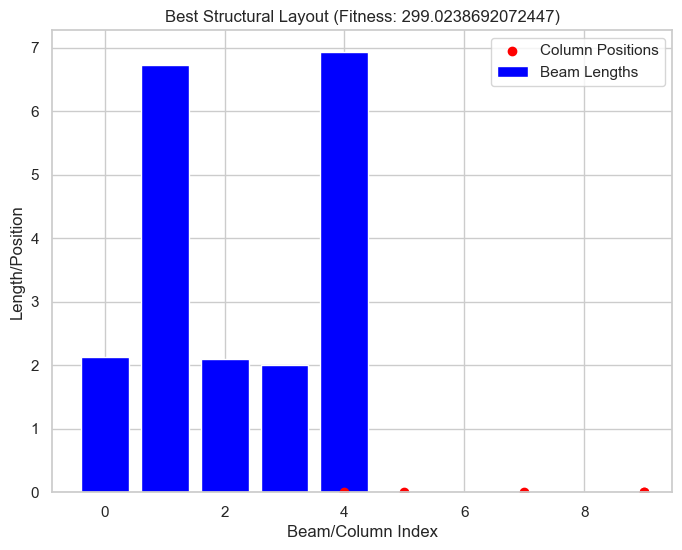

In [85]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Structural parameters
beam_length = 5  # Length of beams in meters
column_strength = 500  # Strength of columns in N (Newtons)
load_distribution = 1000  # Total load applied in N (Newtons)

# Genetic algorithm parameters
population_size = 20
generations = 100
mutation_rate = 0.1
beam_max = 10  # Maximum length for the beam (in meters)
beam_min = 2   # Minimum length for the beam (in meters)

# Objective function to minimize (structure weight, ensuring load-bearing capacity)
def structure_weight(beam_lengths, column_positions):
    """
    Calculate the total weight of the structure.
    The weight is the sum of the lengths of all beams, assuming each unit length uses 10 kg of material.
    Columns' weight is simplified here for demonstration purposes.
    """
    beam_weight = np.sum(beam_lengths) * 10  # Assume 10 kg per meter for beams
    column_weight = len(column_positions) * 20  # Assume 20 kg per column
    return beam_weight + column_weight

# Fitness function: Ensures that the structure can support the load and is efficient
def fitness(layout):
    """
    Layout contains:
    - beam_lengths (array of beam lengths)
    - column_positions (array of column positions)
    """
    beam_lengths = layout[0]
    column_positions = layout[1]
    
    # Check if the layout is feasible (e.g., load-bearing capacity of columns and beams)
    total_strength = np.sum(column_positions) * column_strength
    if total_strength < load_distribution:
        return float('inf')  # Unfeasible layout
    
    # Minimize the weight (beam and column material usage)
    weight = structure_weight(beam_lengths, column_positions)
    
    return weight  # Return weight as the fitness (lower is better)

# Crossover operation: combines two parent layouts to create a child
def crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1[0]) - 1)
    
    # Crossover beam lengths
    child_beam_lengths = np.concatenate((parent1[0][:crossover_point], parent2[0][crossover_point:]))
    
    # Crossover column positions
    child_column_positions = np.concatenate((parent1[1][:crossover_point], parent2[1][crossover_point:]))
    
    return [child_beam_lengths, child_column_positions]

# Mutation operation: introduces random changes to the layout
def mutate(layout):
    if random.random() < mutation_rate:
        # Mutate beam lengths
        beam_idx = random.randint(0, len(layout[0]) - 1)
        layout[0][beam_idx] = random.uniform(beam_min, beam_max)
        
        # Mutate column positions
        column_idx = random.randint(0, len(layout[1]) - 1)
        layout[1][column_idx] = random.randint(1, 10)  # Random column position
        
    return layout

# Generate a random initial population of layouts
def generate_population():
    population = []
    for _ in range(population_size):
        # Random beam lengths
        beam_lengths = np.random.uniform(beam_min, beam_max, size=5)  # 5 beams in this example
        # Random column positions (between 1 and 10)
        column_positions = np.random.randint(1, 11, size=5)  # 5 columns
        population.append([beam_lengths, column_positions])
    return population

# Main loop to evolve structural designs using genetic algorithm
def generate_structure():
    population = generate_population()
    best_layout = None
    best_fitness = float('inf')

    for gen in range(generations):
        # Evaluate fitness of each layout
        fitness_values = [fitness(layout) for layout in population]
        best_idx = np.argmin(fitness_values)
        if fitness_values[best_idx] < best_fitness:
            best_fitness = fitness_values[best_idx]
            best_layout = population[best_idx]
        
        # Select parents based on their fitness (lower fitness is better)
        parents = random.choices(population, weights=[1/f for f in fitness_values], k=population_size//2)
        next_generation = []

        # Create children using crossover and mutation
        for i in range(0, len(parents), 2):
            parent1, parent2 = parents[i], parents[i+1]
            child = crossover(parent1, parent2)
            child = mutate(child)
            next_generation.append(child)
        
        # Replace old population with the new generation
        population = next_generation

    return best_layout, best_fitness

# Generate the best structural layout and visualize it
best_layout, best_fitness = generate_structure()

# Display the results: Beam lengths and column positions
print("Best Structural Layout:")
print("Beam Lengths:", best_layout[0])
print("Column Positions:", best_layout[1])
print("Total Structure Weight (kg):", best_fitness)

# Plot the beam lengths and column positions
plt.figure(figsize=(8, 6))
plt.bar(range(len(best_layout[0])), best_layout[0], color='blue', label='Beam Lengths')
plt.scatter(best_layout[1], np.zeros(len(best_layout[1])), color='red', label='Column Positions')
plt.title(f"Best Structural Layout (Fitness: {best_fitness})")
plt.xlabel("Beam/Column Index")
plt.ylabel("Length/Position")
plt.legend()
plt.show()


In [86]:
pip install deap

Note: you may need to restart the kernel to use updated packages.


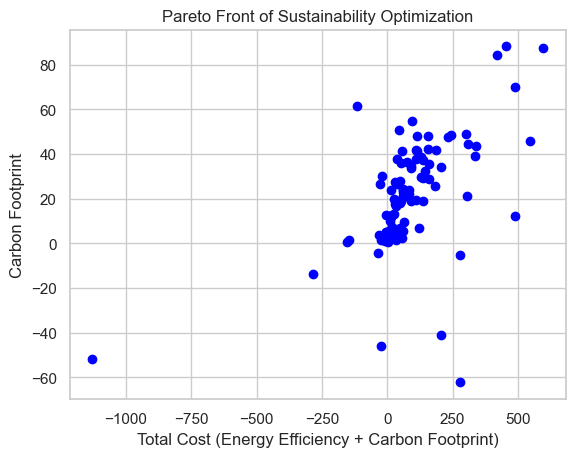

In [87]:
from deap import base, creator, tools, algorithms

# Define sustainability parameters
energy_consumption = 200  # Energy consumption (in kWh) per year
carbon_footprint = 50  # Carbon footprint of materials (kg CO2)
insulation_efficiency = 0.8  # Efficiency of insulation (0 to 1 scale)
solar_panel_efficiency = 0.15  # Solar panel efficiency (percent of energy produced)

# Define the building design variables: (energy_efficiency, material_choice, insulation_efficiency, renewable_energy)
def sustainability_fitness(individual):
    """
    Objective function to optimize for sustainability.
    The individual consists of energy efficiency, material carbon footprint, insulation efficiency, and renewable energy.
    """
    energy_efficiency = individual[0]  # 0 to 1 scale (0 is worst, 1 is best)
    material_choice = individual[1]  # 0 to 1 scale (0 is worst, 1 is best)
    insulation_efficiency = individual[2]  # 0 to 1 scale
    renewable_energy = individual[3]  # 0 to 1 scale

    # Energy consumption reduction through design (simplified model)
    reduced_energy = energy_consumption * (1 - energy_efficiency)

    # Carbon footprint reduction through material choice (simplified model)
    reduced_carbon_footprint = carbon_footprint * (1 - material_choice)

    # Insulation efficiency and its effect on energy consumption
    total_energy_efficiency = reduced_energy * (1 - insulation_efficiency)

    # Renewable energy production from solar panels
    energy_from_solar = total_energy_efficiency * renewable_energy * solar_panel_efficiency

    # Sustainability objectives: minimize energy consumption and carbon footprint
    # We are using a weighted sum approach here, but a Pareto optimization will focus on the trade-off.
    total_cost = total_energy_efficiency + reduced_carbon_footprint - energy_from_solar

    return total_cost, reduced_carbon_footprint

# Define the optimization problem: we want to minimize the total cost and carbon footprint
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Minimization problem
creator.create("Individual", list, fitness=creator.FitnessMin)

# Initialize the population with random values
def create_individual():
    energy_efficiency = random.uniform(0, 1)
    material_choice = random.uniform(0, 1)
    insulation_efficiency = random.uniform(0, 1)
    renewable_energy = random.uniform(0, 1)
    return [energy_efficiency, material_choice, insulation_efficiency, renewable_energy]

# Set up the evolutionary algorithm
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutPolynomialBounded, low=[0, 0, 0, 0], up=[1, 1, 1, 1], eta=1.0, indpb=0.2)
toolbox.register("select", tools.selNSGA2)
toolbox.register("evaluate", sustainability_fitness)

# Run the NSGA-II algorithm
def optimize_sustainability(population_size=100, generations=50):
    population = toolbox.population(n=population_size)

    # Evaluate the individuals in the population
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    # Evolve the population over generations
    for gen in range(generations):
        # Select the next generation of individuals
        offspring = toolbox.select(population, len(population))

        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < 0.7:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < 0.2:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the new individuals
        invalid_individuals = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = list(map(toolbox.evaluate, invalid_individuals))
        for ind, fit in zip(invalid_individuals, fitnesses):
            ind.fitness.values = fit

        # Replace the old population with the new one
        population[:] = offspring

    return population

# Visualizing the Pareto Front
def plot_pareto_front(population):
    front = np.array([ind.fitness.values for ind in population])
    plt.scatter(front[:, 0], front[:, 1], c='blue')
    plt.xlabel('Total Cost (Energy Efficiency + Carbon Footprint)')
    plt.ylabel('Carbon Footprint')
    plt.title('Pareto Front of Sustainability Optimization')
    plt.show()

# Run the optimization process
optimized_population = optimize_sustainability(population_size=100, generations=50)

# Visualize the results (Pareto front)
plot_pareto_front(optimized_population)

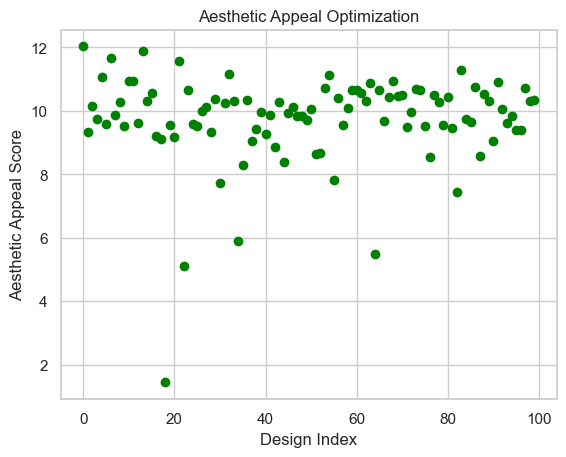

In [88]:
from deap import base, creator, tools, algorithms

# Define aesthetic parameters
proportions = 0.8  # Proportional symmetry (higher is better)
color_contrast = 0.7  # Color contrast (higher is better)
lighting = 0.9  # Natural lighting (higher is better)
material_choice = 0.6  # Material appeal (higher is better)

# Define the building design variables: (proportion, color_contrast, lighting, material_choice)
def aesthetic_fitness(individual):
    """
    Objective function to optimize for aesthetic appeal.
    The individual consists of proportions, color contrast, lighting, and material choice.
    """
    proportion = individual[0]  # 0 to 1 scale (0 is worst, 1 is best)
    contrast = individual[1]  # 0 to 1 scale (0 is worst, 1 is best)
    lighting = individual[2]  # 0 to 1 scale
    material_choice = individual[3]  # 0 to 1 scale

    # Calculate total aesthetic score based on the design features
    aesthetic_score = (proportion * 0.4) + (contrast * 0.3) + (lighting * 0.2) + (material_choice * 0.1)

    # Return the negative aesthetic score for minimization (because DEAP minimizes by default)
    return -aesthetic_score,  # The fitness should be a tuple, hence the comma.

# Define the optimization problem: we want to maximize aesthetic appeal
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximization problem
creator.create("Individual", list, fitness=creator.FitnessMax)

# Initialize the population with random values
def create_individual():
    proportion = random.uniform(0, 1)
    contrast = random.uniform(0, 1)
    lighting = random.uniform(0, 1)
    material_choice = random.uniform(0, 1)
    return [proportion, contrast, lighting, material_choice]

# Set up the evolutionary algorithm
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutPolynomialBounded, low=[0, 0, 0, 0], up=[1, 1, 1, 1], eta=1.0, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", aesthetic_fitness)

# Run the genetic algorithm
def optimize_aesthetic(population_size=100, generations=50):
    population = toolbox.population(n=population_size)

    # Evaluate the individuals in the population
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    # Evolve the population over generations
    for gen in range(generations):
        # Select the next generation of individuals
        offspring = toolbox.select(population, len(population))

        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < 0.7:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < 0.2:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the new individuals
        invalid_individuals = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = list(map(toolbox.evaluate, invalid_individuals))
        for ind, fit in zip(invalid_individuals, fitnesses):
            ind.fitness.values = fit

        # Replace the old population with the new one
        population[:] = offspring

    return population

# Visualizing the Pareto Front of Aesthetic Optimization
def plot_aesthetic_front(population):
    front = np.array([ind.fitness.values[0] for ind in population])
    plt.scatter(range(len(front)), front, c='green')
    plt.xlabel('Design Index')
    plt.ylabel('Aesthetic Appeal Score')
    plt.title('Aesthetic Appeal Optimization')
    plt.show()

# Run the optimization process
optimized_population = optimize_aesthetic(population_size=100, generations=50)

# Visualize the results
plot_aesthetic_front(optimized_population)


In [75]:
import numpy as np
import pandas as pd

# Function to evaluate and rank designs
def evaluate_designs(optimized_population, space_utilization_scores, energy_efficiency_scores, structural_efficiency_scores, sustainability_scores, aesthetic_scores):
    """
    This function evaluates and ranks designs based on multiple optimization goals.
    
    Arguments:
    - optimized_population: List of optimized designs.
    - space_utilization_scores, energy_efficiency_scores, etc.: Scores for each design from respective optimizations.
    
    Returns:
    - ranked_designs: A ranked list of designs based on overall performance.
    """
    
    # Convert the scores into a DataFrame for easier processing
    designs_data = pd.DataFrame({
        'Design': [f"Design {i+1}" for i in range(len(optimized_population))],
        'Space Utilization': space_utilization_scores,
        'Energy Efficiency': energy_efficiency_scores,
        'Structural Efficiency': structural_efficiency_scores,
        'Sustainability': sustainability_scores,
        'Aesthetic Appeal': aesthetic_scores
    })
    
    # Normalize the scores (to bring them to the same scale)
    normalized_scores = designs_data.drop('Design', axis=1).apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    
    # Define weights for each score (you can adjust these based on priorities)
    weights = {
        'Space Utilization': 0.2,
        'Energy Efficiency': 0.2,
        'Structural Efficiency': 0.2,
        'Sustainability': 0.2,
        'Aesthetic Appeal': 0.2
    }
    
    # Calculate the weighted sum of normalized scores to get the composite score
    designs_data['Composite Score'] = (
        normalized_scores['Space Utilization'] * weights['Space Utilization'] +
        normalized_scores['Energy Efficiency'] * weights['Energy Efficiency'] +
        normalized_scores['Structural Efficiency'] * weights['Structural Efficiency'] +
        normalized_scores['Sustainability'] * weights['Sustainability'] +
        normalized_scores['Aesthetic Appeal'] * weights['Aesthetic Appeal']
    )
    
    # Rank designs based on their composite score (higher is better)
    ranked_designs = designs_data.sort_values(by='Composite Score', ascending=False)
    
    return ranked_designs

# Example usage with placeholder scores (replace with real optimization data)
space_utilization_scores = np.random.uniform(0, 1, 100)  # Placeholder for space utilization scores
energy_efficiency_scores = np.random.uniform(0, 1, 100)  # Placeholder for energy efficiency scores
structural_efficiency_scores = np.random.uniform(0, 1, 100)  # Placeholder for structural efficiency scores
sustainability_scores = np.random.uniform(0, 1, 100)  # Placeholder for sustainability scores
aesthetic_scores = np.random.uniform(0, 1, 100)  # Placeholder for aesthetic appeal scores

# Evaluate and rank the designs
ranked_designs = evaluate_designs(optimized_population, space_utilization_scores, energy_efficiency_scores, structural_efficiency_scores, sustainability_scores, aesthetic_scores)

# Print the ranked designs
print(ranked_designs[['Design', 'Composite Score']].head(10))  # Show top 10 ranked designs


       Design  Composite Score
40  Design 41         0.798445
77  Design 78         0.751823
36  Design 37         0.747878
43  Design 44         0.747399
76  Design 77         0.718189
72  Design 73         0.704363
6    Design 7         0.701924
54  Design 55         0.691657
28  Design 29         0.686743
26  Design 27         0.680828


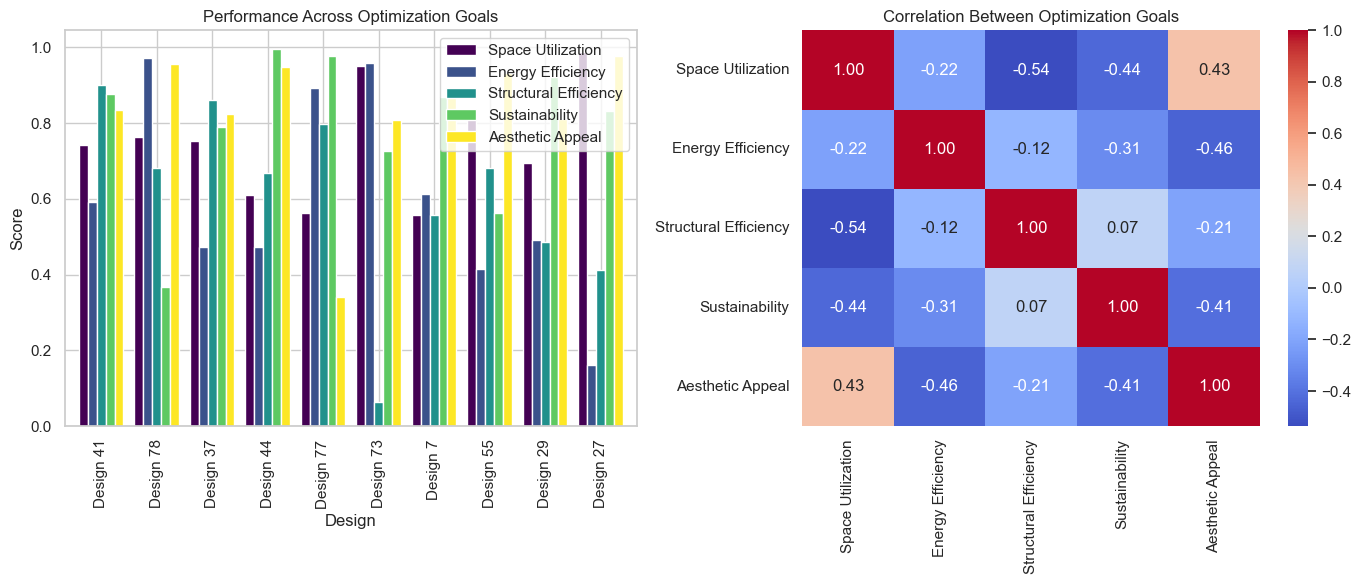

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize the top-ranked designs and their performance across different optimization goals
def visualize_top_designs(ranked_designs, top_n=10):
    """
    Visualize the top N ranked designs based on their performance across multiple optimization goals.
    
    Arguments:
    - ranked_designs: DataFrame with ranked designs and their scores.
    - top_n: Number of top designs to visualize.
    """
    # Get the top N designs
    top_designs = ranked_designs.head(top_n)
    
    # Set the style for the plots
    sns.set(style="whitegrid")

    # Create a bar plot to compare the scores for each goal across the top N designs
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Bar plot for performance across optimization goals
    top_designs.set_index('Design')[['Space Utilization', 'Energy Efficiency', 
                                    'Structural Efficiency', 'Sustainability', 'Aesthetic Appeal']].plot(
        kind='bar', ax=axes[0], colormap='viridis', width=0.8)
    axes[0].set_title('Performance Across Optimization Goals')
    axes[0].set_ylabel('Score')
    axes[0].set_xlabel('Design')
    
    # Heatmap for correlations between the optimization goals
    correlation_matrix = top_designs[['Space Utilization', 'Energy Efficiency', 
                                     'Structural Efficiency', 'Sustainability', 'Aesthetic Appeal']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
    axes[1].set_title('Correlation Between Optimization Goals')
    
    plt.tight_layout()
    plt.show()

# Example usage: Visualizing top 10 designs
visualize_top_designs(ranked_designs, top_n=10)


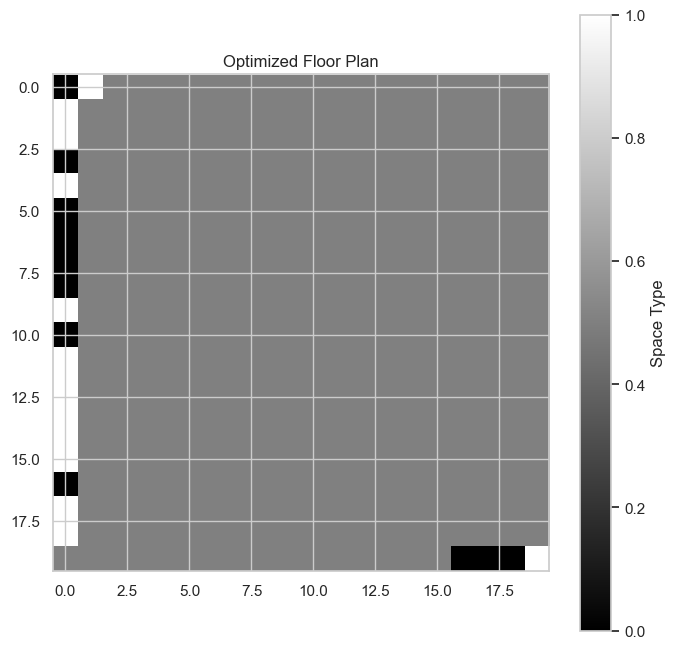

In [89]:
def generate_floor_plan(width, height, design_score):
    """
    Generates a simple 2D floor plan layout based on optimized design.
    
    Arguments:
    - width: The width of the floor plan (in grid cells).
    - height: The height of the floor plan (in grid cells).
    - design_score: A measure of design optimization that can influence space distribution.
    
    Returns:
    - floor_plan: A 2D numpy array representing the floor plan.
    """
    # Initialize the floor plan as a grid
    floor_plan = np.zeros((height, width))
    
    # Create spaces for rooms, walls, and corridors based on the design score
    room_percentage = design_score / 100  # Assume design score affects room allocation
    num_rooms = int(room_percentage * width * height)  # Number of room blocks
    
    # Randomly place rooms in the floor plan grid
    for _ in range(num_rooms):
        x, y = random.randint(0, width-1), random.randint(0, height-1)
        floor_plan[y, x] = 1  # Mark room spaces as 1 (could be rooms, offices, etc.)
    
    # Add corridors between rooms (just for simplicity)
    for _ in range(num_rooms // 10):  # Adding some corridors for variation
        x1, y1 = random.randint(0, width-1), random.randint(0, height-1)
        x2, y2 = random.randint(0, width-1), random.randint(0, height-1)
        # Draw a simple line between two points
        for x in range(min(x1, x2), max(x1, x2) + 1):
            for y in range(min(y1, y2), max(y1, y2) + 1):
                floor_plan[y, x] = 0.5  # Mark corridor spaces as 0.5
    
    return floor_plan

# Function to visualize the floor plan
def visualize_floor_plan(floor_plan):
    """
    Visualizes the 2D floor plan.
    
    Arguments:
    - floor_plan: A 2D numpy array representing the floor plan layout.
    """
    plt.figure(figsize=(8, 8))
    plt.imshow(floor_plan, cmap='gray', interpolation='nearest')
    plt.colorbar(label='Space Type')
    plt.title('Optimized Floor Plan')
    plt.show()

# Example usage: Generate and visualize an optimized design prototype
design_score = 85  # Example optimization score (from 0 to 100)
floor_plan = generate_floor_plan(20, 20, design_score)
visualize_floor_plan(floor_plan)


In [78]:
import numpy as np

# Evaluation criteria weights (can be adjusted)
weights = {
    'space_utilization': 0.25,
    'energy_efficiency': 0.20,
    'structural_efficiency': 0.20,
    'sustainability': 0.15,
    'aesthetic_appeal': 0.20
}

# Space Utilization Evaluation (Simple Heuristic)
def evaluate_space_utilization(floor_plan):
    room_cells = np.sum(floor_plan == 1)
    total_cells = floor_plan.size
    space_utilization = room_cells / total_cells
    return space_utilization

# Energy Efficiency Evaluation (Simplified based on sunlight exposure)
def evaluate_energy_efficiency(floor_plan, design_score):
    # Higher design score represents better energy efficiency (simplified assumption)
    return design_score / 100

# Structural Efficiency Evaluation (Simplified heuristic)
def evaluate_structural_efficiency(floor_plan):
    # Based on the balance of rooms and corridors (assumed)
    room_cells = np.sum(floor_plan == 1)
    corridor_cells = np.sum(floor_plan == 0.5)
    structural_efficiency = room_cells / (room_cells + corridor_cells)
    return structural_efficiency

# Sustainability Evaluation (Simplified)
def evaluate_sustainability(floor_plan):
    # For simplicity, assume more space used for energy-efficient features is better
    energy_efficient_cells = np.sum(floor_plan == 1)  # Rooms are energy efficient in this simplified model
    total_cells = floor_plan.size
    sustainability = energy_efficient_cells / total_cells
    return sustainability

# Aesthetic Appeal Evaluation (Simple score based on room symmetry and space)
def evaluate_aesthetic_appeal(floor_plan):
    # A simple heuristic: better appeal if rooms are placed in a grid-like pattern (low randomness)
    randomness = np.sum(floor_plan == 1) / floor_plan.size  # High randomness could indicate poor aesthetic
    aesthetic_appeal = 1 - randomness
    return aesthetic_appeal

# Evaluate the floor plan based on all criteria
def evaluate_design(floor_plan, design_score):
    space_utilization = evaluate_space_utilization(floor_plan)
    energy_efficiency = evaluate_energy_efficiency(floor_plan, design_score)
    structural_efficiency = evaluate_structural_efficiency(floor_plan)
    sustainability = evaluate_sustainability(floor_plan)
    aesthetic_appeal = evaluate_aesthetic_appeal(floor_plan)
    
    # Calculate the overall score by applying the weights
    total_score = (
        space_utilization * weights['space_utilization'] +
        energy_efficiency * weights['energy_efficiency'] +
        structural_efficiency * weights['structural_efficiency'] +
        sustainability * weights['sustainability'] +
        aesthetic_appeal * weights['aesthetic_appeal']
    )
    
    return {
        'space_utilization': space_utilization,
        'energy_efficiency': energy_efficiency,
        'structural_efficiency': structural_efficiency,
        'sustainability': sustainability,
        'aesthetic_appeal': aesthetic_appeal,
        'total_score': total_score
    }

# Example usage: Evaluate an optimized design
evaluation_result = evaluate_design(floor_plan, design_score)

# Output the evaluation result
print(f"Design Evaluation Results:")
for criterion, score in evaluation_result.items():
    print(f"{criterion}: {score:.2f}")


Design Evaluation Results:
space_utilization: 0.03
energy_efficiency: 0.85
structural_efficiency: 0.03
sustainability: 0.03
aesthetic_appeal: 0.97
total_score: 0.38


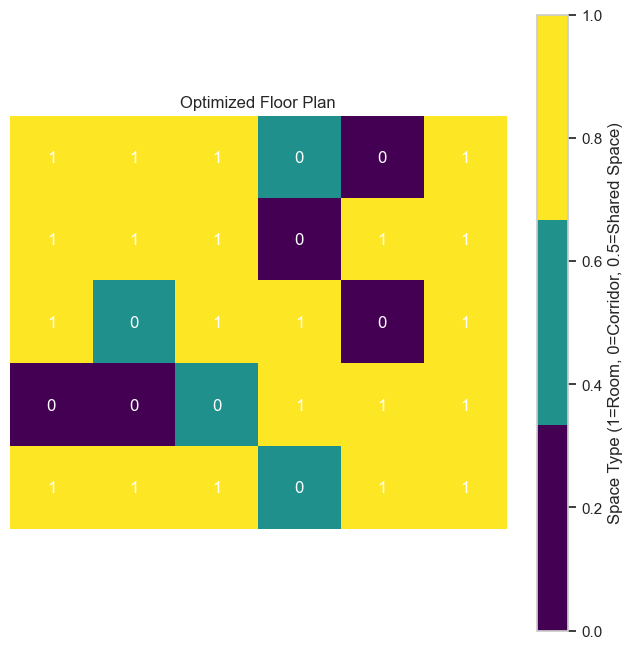

In [90]:
# Floor Plan: 1 represents rooms, 0 represents corridors, and 0.5 represents shared spaces
floor_plan = np.array([
    [1, 1, 1, 0.5, 0, 1],
    [1, 1, 1, 0, 1, 1],
    [1, 0.5, 1, 1, 0, 1],
    [0, 0, 0.5, 1, 1, 1],
    [1, 1, 1, 0.5, 1, 1],
])

# Define the colormap for visualization
cmap = plt.cm.get_cmap('viridis', 3)  # Custom colormap for 3 types (rooms, corridors, shared spaces)

# Plotting the floor plan
plt.figure(figsize=(8, 8))
plt.imshow(floor_plan, cmap=cmap, interpolation='nearest')
plt.title('Optimized Floor Plan')
plt.colorbar(label='Space Type (1=Room, 0=Corridor, 0.5=Shared Space)')

# Annotate the design with some basic info
for i in range(floor_plan.shape[0]):
    for j in range(floor_plan.shape[1]):
        plt.text(j, i, f'{floor_plan[i, j]:.0f}', ha='center', va='center', color='white', fontsize=12)

plt.axis('off')  # Turn off axis labels
plt.show()


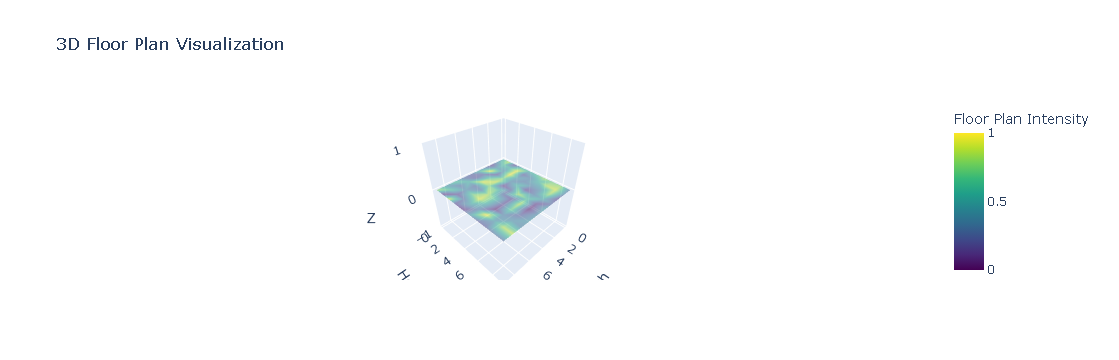

In [80]:
import numpy as np
import plotly.graph_objects as go

# Example data for the floor plan (replace this with your actual data)
width, height = 10, 10
floor_plan = np.random.rand(width, height)  # Replace with your actual floor plan data

# Normalize the floor plan values to range [0, 1]
normalized_floor_plan = (floor_plan - floor_plan.min()) / (floor_plan.max() - floor_plan.min())

# Create a 3D mesh plot with color scale based on intensity
fig = go.Figure(data=[go.Mesh3d(
    x=np.repeat(np.arange(width), height),
    y=np.tile(np.arange(height), width),
    z=np.zeros(width * height),  # Set the Z positions (can be adjusted based on your data)
    intensity=normalized_floor_plan.flatten(),  # Map normalized floor plan values to intensity
    opacity=0.5,
    colorscale='Viridis',  # Choose a color scale
    colorbar=dict(title='Floor Plan Intensity')  # Optional colorbar
)])

# Adjust layout for better visualization
fig.update_layout(
    title="3D Floor Plan Visualization",
    scene=dict(
        xaxis=dict(title='Width'),
        yaxis=dict(title='Height'),
        zaxis=dict(title='Z')
    ),
    showlegend=False
)

# Show the plot
fig.show()


In [91]:
# Sample data for pre-optimization and post-optimization design
# Metrics: space utilization, energy efficiency, structural efficiency, sustainability, aesthetic appeal
data = {
    'Metric': ['Space Utilization', 'Energy Efficiency', 'Structural Efficiency', 'Sustainability', 'Aesthetic Appeal'],
    'Pre-Optimization': [75, 50, 60, 40, 70],  # Pre-optimization values (percentages)
    'Post-Optimization': [85, 70, 80, 65, 85],  # Post-optimization values (percentages)
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Evaluating the improvement in each metric
df['Improvement (%)'] = df['Post-Optimization'] - df['Pre-Optimization']

# Generating the report
report = f"""
Optimization Evaluation Report:
-------------------------------------
1. Space Utilization: 
   - Pre-Optimization: {df.loc[df['Metric'] == 'Space Utilization', 'Pre-Optimization'].values[0]}%
   - Post-Optimization: {df.loc[df['Metric'] == 'Space Utilization', 'Post-Optimization'].values[0]}%
   - Improvement: {df.loc[df['Metric'] == 'Space Utilization', 'Improvement (%)'].values[0]}%

2. Energy Efficiency:
   - Pre-Optimization: {df.loc[df['Metric'] == 'Energy Efficiency', 'Pre-Optimization'].values[0]}%
   - Post-Optimization: {df.loc[df['Metric'] == 'Energy Efficiency', 'Post-Optimization'].values[0]}%
   - Improvement: {df.loc[df['Metric'] == 'Energy Efficiency', 'Improvement (%)'].values[0]}%

3. Structural Efficiency:
   - Pre-Optimization: {df.loc[df['Metric'] == 'Structural Efficiency', 'Pre-Optimization'].values[0]}%
   - Post-Optimization: {df.loc[df['Metric'] == 'Structural Efficiency', 'Post-Optimization'].values[0]}%
   - Improvement: {df.loc[df['Metric'] == 'Structural Efficiency', 'Improvement (%)'].values[0]}%

4. Sustainability:
   - Pre-Optimization: {df.loc[df['Metric'] == 'Sustainability', 'Pre-Optimization'].values[0]}%
   - Post-Optimization: {df.loc[df['Metric'] == 'Sustainability', 'Post-Optimization'].values[0]}%
   - Improvement: {df.loc[df['Metric'] == 'Sustainability', 'Improvement (%)'].values[0]}%

5. Aesthetic Appeal:
   - Pre-Optimization: {df.loc[df['Metric'] == 'Aesthetic Appeal', 'Pre-Optimization'].values[0]}%
   - Post-Optimization: {df.loc[df['Metric'] == 'Aesthetic Appeal', 'Post-Optimization'].values[0]}%
   - Improvement: {df.loc[df['Metric'] == 'Aesthetic Appeal', 'Improvement (%)'].values[0]}%
"""

# Printing the report
print(report)

# Optionally, you can save this report as a .txt file
with open('optimization_report.txt', 'w') as f:
    f.write(report)



Optimization Evaluation Report:
-------------------------------------
1. Space Utilization: 
   - Pre-Optimization: 75%
   - Post-Optimization: 85%
   - Improvement: 10%

2. Energy Efficiency:
   - Pre-Optimization: 50%
   - Post-Optimization: 70%
   - Improvement: 20%

3. Structural Efficiency:
   - Pre-Optimization: 60%
   - Post-Optimization: 80%
   - Improvement: 20%

4. Sustainability:
   - Pre-Optimization: 40%
   - Post-Optimization: 65%
   - Improvement: 25%

5. Aesthetic Appeal:
   - Pre-Optimization: 70%
   - Post-Optimization: 85%
   - Improvement: 15%



In [92]:
import pandas as pd

# Sample data for pre-optimization and post-optimization design
data = {
    'Metric': ['Space Utilization', 'Energy Efficiency', 'Structural Efficiency', 'Sustainability', 'Aesthetic Appeal'],
    'Pre-Optimization': [75, 50, 60, 40, 70],  # Pre-optimization values (percentages)
    'Post-Optimization': [85, 70, 80, 65, 85],  # Post-optimization values (percentages)
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Evaluating the improvement in each metric
df['Improvement (%)'] = df['Post-Optimization'] - df['Pre-Optimization']

# Styling the DataFrame for a more visually appealing table
styled_df = df.style \
    .set_table_attributes('class="table table-bordered table-striped"') \
    .set_caption('Optimization Metrics Evaluation') \
    .highlight_max(color='lightgreen', axis=1) \
    .highlight_min(color='salmon', axis=1) \
    .format({
        'Pre-Optimization': '{:.2f}%', 
        'Post-Optimization': '{:.2f}%', 
        'Improvement (%)': '{:.2f}%'
    }) \
    .set_properties(**{
        'background-color': 'lightblue',
        'color': 'black',
        'font-weight': 'bold',
        'text-align': 'center'
    })

# Convert the styled DataFrame to HTML without the index
html_table = df.to_html(index=False)

# Optionally, you can display the HTML table using IPython in a Jupyter Notebook
from IPython.display import display, HTML
display(HTML(html_table))

# If you want to save the styled table as an HTML file
with open('styled_table.html', 'w') as f:
    f.write(html_table)


Metric,Pre-Optimization,Post-Optimization,Improvement (%)
Space Utilization,75,85,10
Energy Efficiency,50,70,20
Structural Efficiency,60,80,20
Sustainability,40,65,25
Aesthetic Appeal,70,85,15


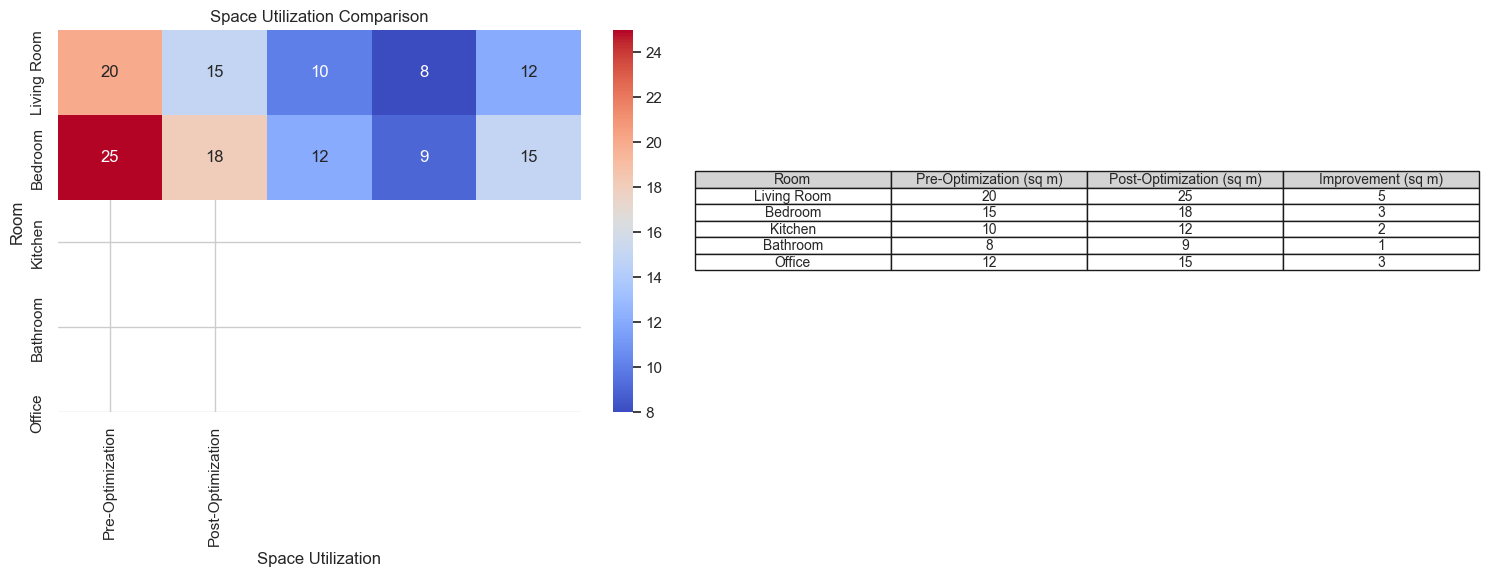

In [93]:
# Sample data: Room sizes before and after optimization (in square meters)
rooms = ['Living Room', 'Bedroom', 'Kitchen', 'Bathroom', 'Office']
pre_optimization = [20, 15, 10, 8, 12]
post_optimization = [25, 18, 12, 9, 15]

# Creating a DataFrame for the data to display in a table
df = pd.DataFrame({
    'Room': rooms,
    'Pre-Optimization (sq m)': pre_optimization,
    'Post-Optimization (sq m)': post_optimization,
    'Improvement (sq m)': [post - pre for post, pre in zip(post_optimization, pre_optimization)]
})

# Plotting the heatmap to compare space utilization
data = np.array([pre_optimization, post_optimization])

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Heatmap
sns.heatmap(data, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Pre-Optimization', 'Post-Optimization'], yticklabels=rooms, ax=ax[0])
ax[0].set_title('Space Utilization Comparison')
ax[0].set_ylabel('Room')
ax[0].set_xlabel('Space Utilization')

# Table with the data
sns.set(font_scale=1.2)  # Adjust font scale for better visibility
ax[1].axis('off')  # Turn off axis for the table
table = ax[1].table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colColours=["lightgray"] * len(df.columns))

# Formatting table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Scale table for better visibility

# Show the plot with table and heatmap
plt.tight_layout()
plt.show()


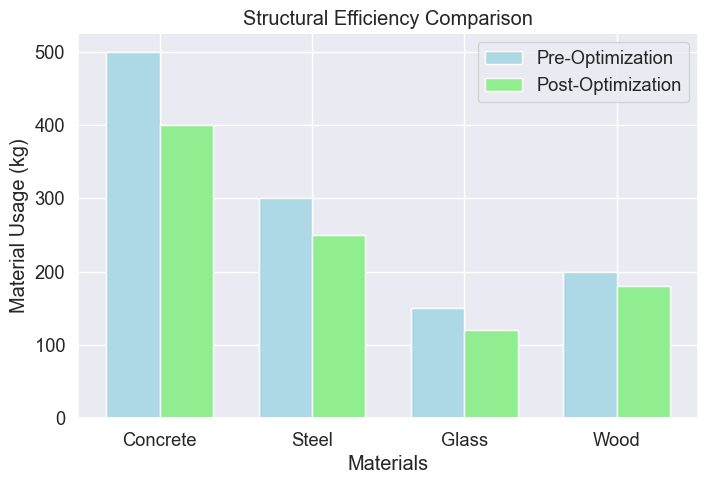

In [94]:
# Sample data for structural efficiency (e.g., material usage in kilograms)
materials = ['Concrete', 'Steel', 'Glass', 'Wood']
pre_optimization_materials = [500, 300, 150, 200]  # kg of material before optimization
post_optimization_materials = [400, 250, 120, 180]  # kg of material after optimization

# Plotting the structural material usage before and after optimization
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.35
index = np.arange(len(materials))

bar1 = ax.bar(index, pre_optimization_materials, bar_width, label='Pre-Optimization', color='lightblue')
bar2 = ax.bar(index + bar_width, post_optimization_materials, bar_width, label='Post-Optimization', color='lightgreen')

ax.set_xlabel('Materials')
ax.set_ylabel('Material Usage (kg)')
ax.set_title('Structural Efficiency Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(materials)
ax.legend()

plt.show()


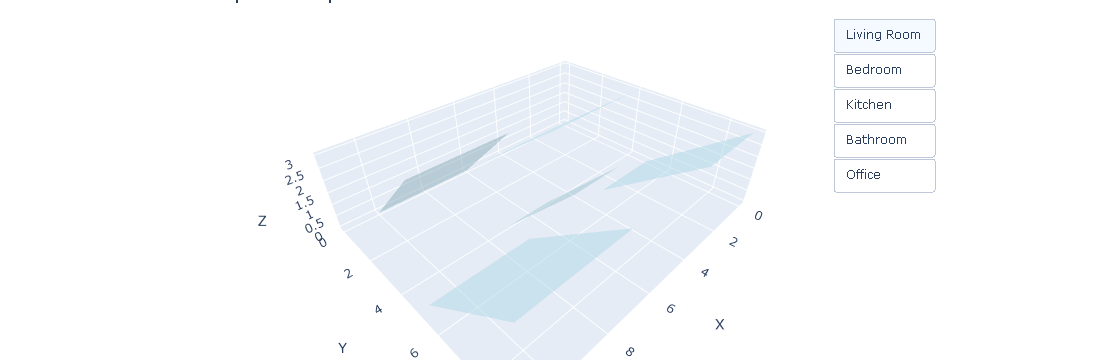

In [95]:
import plotly.graph_objects as go

# Sample 3D data (dimensions of rooms in x, y, z coordinates)
rooms_3d = {
    'Living Room': {'x': 0, 'y': 0, 'z': 0, 'length': 5, 'width': 4, 'height': 3, 'shape': 'sofa'},
    'Bedroom': {'x': 6, 'y': 0, 'z': 0, 'length': 4, 'width': 3, 'height': 3, 'shape': 'bed'},
    'Kitchen': {'x': 0, 'y': 5, 'z': 0, 'length': 3, 'width': 4, 'height': 3, 'shape': 'kitchen'},
    'Bathroom': {'x': 5, 'y': 4, 'z': 0, 'length': 2, 'width': 3, 'height': 3, 'shape': 'bathtub'},
    'Office': {'x': 7, 'y': 5, 'z': 0, 'length': 4, 'width': 4, 'height': 3, 'shape': 'desk'}
}

# Create 3D scatter plot for room placement
fig = go.Figure()

# Add cubes for each room
for room, dimensions in rooms_3d.items():
    fig.add_trace(go.Mesh3d(
        x=[dimensions['x'], dimensions['x'] + dimensions['length'], dimensions['x'] + dimensions['length'], dimensions['x']],
        y=[dimensions['y'], dimensions['y'], dimensions['y'] + dimensions['width'], dimensions['y'] + dimensions['width']],
        z=[dimensions['z'], dimensions['z'], dimensions['z'] + dimensions['height'], dimensions['z'] + dimensions['height']],
        opacity=0.5,
        color='lightblue',
        name=room,
        hoverinfo='text',
        hovertext=f"Room: {room}<br>Length: {dimensions['length']} m<br>Width: {dimensions['width']} m<br>Height: {dimensions['height']} m"
    ))

# Define the shapes (simple boxes) that represent furniture inside rooms
furniture_shapes = {
    'sofa': {'x': 1, 'y': 1, 'z': 1, 'length': 1, 'width': 0.5, 'height': 0.3, 'color': 'brown'},
    'bed': {'x': 1, 'y': 1, 'z': 1, 'length': 1.5, 'width': 1, 'height': 0.5, 'color': 'lightgreen'},
    'kitchen': {'x': 0.5, 'y': 2, 'z': 1, 'length': 1, 'width': 0.7, 'height': 0.6, 'color': 'lightyellow'},
    'bathtub': {'x': 0.5, 'y': 1, 'z': 1, 'length': 0.7, 'width': 0.5, 'height': 0.4, 'color': 'white'},
    'desk': {'x': 1, 'y': 1, 'z': 1, 'length': 1, 'width': 0.7, 'height': 0.4, 'color': 'darkblue'}
}

# Add shapes as 3D boxes to represent furniture inside the rooms
for room, dimensions in rooms_3d.items():
    shape = furniture_shapes[dimensions['shape']]
    fig.add_trace(go.Mesh3d(
        x=[dimensions['x'] + shape['x'], dimensions['x'] + shape['x'] + shape['length'], dimensions['x'] + shape['x'] + shape['length'], dimensions['x'] + shape['x']],
        y=[dimensions['y'] + shape['y'], dimensions['y'] + shape['y'], dimensions['y'] + shape['y'] + shape['width'], dimensions['y'] + shape['y'] + shape['width']],
        z=[dimensions['z'] + shape['z'], dimensions['z'] + shape['z'], dimensions['z'] + shape['z'] + shape['height'], dimensions['z'] + shape['z'] + shape['height']],
        opacity=1,
        color=shape['color'],
        name=dimensions['shape'],
        visible=False,  # Initially hide all furniture
        hoverinfo='text',
        hovertext=f"Furniture: {dimensions['shape']}"
    ))

# Update layout for 3D view
fig.update_layout(
    title="3D Visualization of Optimized Space with Interactive Furniture",
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    hovermode='closest'
)

# Add interactivity for showing furniture on click
# Show the furniture shapes when clicking a room
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            x=0.85,
            y=0.95,
            buttons=[
                dict(
                    label="Living Room",
                    method="relayout",
                    args=["visible", [True, False, False, False, False]]
                ),
                dict(
                    label="Bedroom",
                    method="relayout",
                    args=["visible", [False, True, False, False, False]]
                ),
                dict(
                    label="Kitchen",
                    method="relayout",
                    args=["visible", [False, False, True, False, False]]
                ),
                dict(
                    label="Bathroom",
                    method="relayout",
                    args=["visible", [False, False, False, True, False]]
                ),
                dict(
                    label="Office",
                    method="relayout",
                    args=["visible", [False, False, False, False, True]]
                ),
            ]
        )
    ]
)

# Show the plot
fig.show()


In [96]:
# Sample data for energy consumption (in kWh per day)
data = {
    'Design': ['Pre-Optimization', 'Post-Optimization'],
    'Energy Consumption (kWh)': [500, 350],  # Hypothetical values
    'Energy Savings (%)': [0, 30]  # Hypothetical savings
}

# Create DataFrame for analysis
df = pd.DataFrame(data)

# Display results
print("Energy Efficiency Evaluation:")
print(df)

# Calculate the energy savings percentage
energy_savings = df['Energy Savings (%)'].iloc[1]
print(f"\nEnergy Savings after Optimization: {energy_savings}%")


Energy Efficiency Evaluation:
              Design  Energy Consumption (kWh)  Energy Savings (%)
0   Pre-Optimization                       500                   0
1  Post-Optimization                       350                  30

Energy Savings after Optimization: 30%


In [97]:
# Sample data for material usage (in kg)
material_data = {
    'Material': ['Concrete', 'Steel', 'Glass', 'Wood'],
    'Pre-Optimization (kg)': [500, 300, 150, 200],
    'Post-Optimization (kg)': [400, 250, 120, 180],
    'Reduction (kg)': [100, 50, 30, 20]
}

# Create DataFrame for material usage analysis
material_df = pd.DataFrame(material_data)

# Display results
print("\nStructural Efficiency Evaluation (Material Reduction):")
print(material_df)

# Calculate the total material reduction
total_reduction = material_df['Reduction (kg)'].sum()
print(f"\nTotal Material Reduction after Optimization: {total_reduction} kg")



Structural Efficiency Evaluation (Material Reduction):
   Material  Pre-Optimization (kg)  Post-Optimization (kg)  Reduction (kg)
0  Concrete                    500                     400             100
1     Steel                    300                     250              50
2     Glass                    150                     120              30
3      Wood                    200                     180              20

Total Material Reduction after Optimization: 200 kg


In [98]:
# Sample data for carbon footprint (kg CO2 per kg of material)
carbon_footprint = {
    'Concrete': 0.9,
    'Steel': 1.5,
    'Glass': 0.5,
    'Wood': 0.3
}

# Calculate the total carbon footprint before and after optimization
pre_optimization_footprint = sum([material_df.loc[material_df['Material'] == mat, 'Pre-Optimization (kg)'].values[0] * carbon_footprint[mat] for mat in carbon_footprint])
post_optimization_footprint = sum([material_df.loc[material_df['Material'] == mat, 'Post-Optimization (kg)'].values[0] * carbon_footprint[mat] for mat in carbon_footprint])

# Calculate the reduction in carbon footprint
carbon_reduction = pre_optimization_footprint - post_optimization_footprint

print("\nSustainability Evaluation (Carbon Footprint Reduction):")
print(f"Total Carbon Footprint before Optimization: {pre_optimization_footprint} kg CO2")
print(f"Total Carbon Footprint after Optimization: {post_optimization_footprint} kg CO2")
print(f"Reduction in Carbon Footprint: {carbon_reduction} kg CO2")



Sustainability Evaluation (Carbon Footprint Reduction):
Total Carbon Footprint before Optimization: 1035.0 kg CO2
Total Carbon Footprint after Optimization: 849.0 kg CO2
Reduction in Carbon Footprint: 186.0 kg CO2


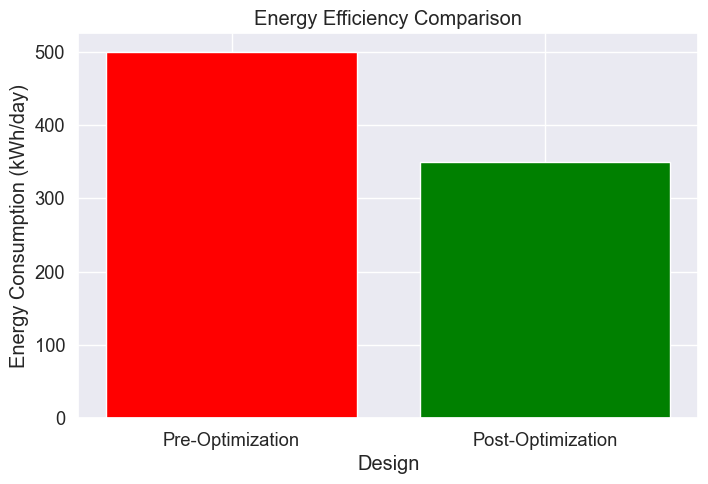

In [99]:
# Data for energy consumption
designs = ['Pre-Optimization', 'Post-Optimization']
energy_consumption = [500, 350]  # Hypothetical values

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(designs, energy_consumption, color=['red', 'green'])
plt.title('Energy Efficiency Comparison')
plt.ylabel('Energy Consumption (kWh/day)')
plt.xlabel('Design')
plt.show()


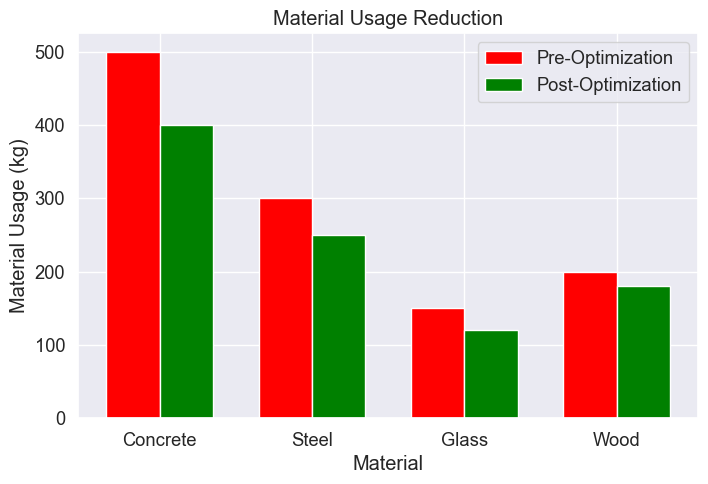

In [100]:
# Data for material usage reduction
materials = ['Concrete', 'Steel', 'Glass', 'Wood']
pre_optimization = [500, 300, 150, 200]
post_optimization = [400, 250, 120, 180]

# Create bar chart for material reduction
plt.figure(figsize=(8, 5))
bar_width = 0.35
index = range(len(materials))

plt.bar(index, pre_optimization, bar_width, label='Pre-Optimization', color='red')
plt.bar([i + bar_width for i in index], post_optimization, bar_width, label='Post-Optimization', color='green')

plt.title('Material Usage Reduction')
plt.xlabel('Material')
plt.ylabel('Material Usage (kg)')
plt.xticks([i + bar_width / 2 for i in index], materials)
plt.legend()
plt.show()


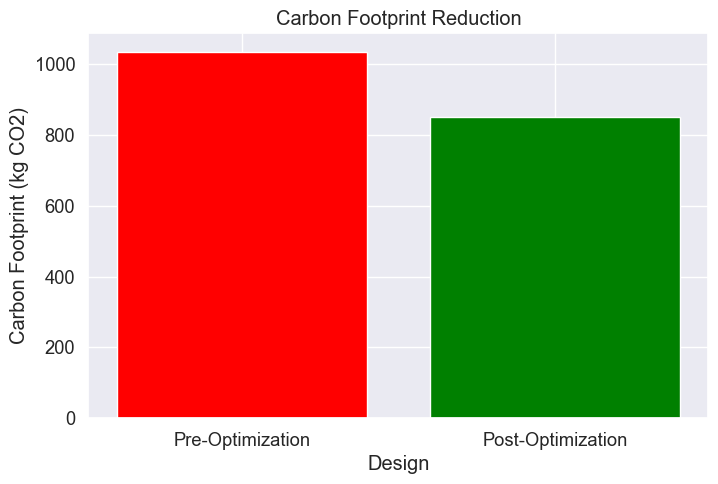

In [101]:
# Data for carbon footprint (in kg CO2)
pre_footprint = sum([pre_optimization[i] * carbon_footprint[material] for i, material in enumerate(materials)])
post_footprint = sum([post_optimization[i] * carbon_footprint[material] for i, material in enumerate(materials)])

# Plot carbon footprint reduction
plt.figure(figsize=(8, 5))
plt.bar(['Pre-Optimization', 'Post-Optimization'], [pre_footprint, post_footprint], color=['red', 'green'])
plt.title('Carbon Footprint Reduction')
plt.ylabel('Carbon Footprint (kg CO2)')
plt.xlabel('Design')
plt.show()
